# Final Project ~ Math 156
## Cole Hannum ~ UID: 405819017

## Section 1) Exploratory Data Analysis

We will start by cleaning, formatting and exploring our data before doing any modeling. This will give us a sense of the overall shape and trends in the data as well as assurance that our data will be in the correct format for modeling.

In [128]:
# import necessary libraries for data analysis/manipulation and visualizations 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [129]:
# Import all data necessary
food_group_1 = pd.read_csv("FOOD-DATA-GROUP1.csv")
food_group_2 = pd.read_csv("FOOD-DATA-GROUP2.csv")
food_group_3 = pd.read_csv("FOOD-DATA-GROUP3.csv")
food_group_4 = pd.read_csv("FOOD-DATA-GROUP4.csv")
food_group_5 = pd.read_csv("FOOD-DATA-GROUP5.csv")

In [130]:

data = pd.concat([food_group_1, food_group_2, food_group_3, food_group_4, food_group_5], # concatenate data into one dataframe 
                      ignore_index= True)

cols_to_drop = ['Unnamed: 0.1', 'Unnamed: 0'] # drop unnecessary columns

data.drop(cols_to_drop, axis = 1, inplace = True)

Upon first inspecion of the dataset there were many outliers present. The most prevalent were cheese that had too high of a nutrition density as compared to all of the other foods. Thus, any food that had the word 'cheese' in the name with a nutrition density above a threshold of 400 was dropped from the dataset. 

There were also certain nutrient density scores that were illogical to the scale that other foods were being measured on. Therefore foods with a nutrition density higher than 500 were dropped from the dataset.

In [131]:
data = data[~((data['Nutrition Density'] >= 400) 
       & (data['food'].str.contains('cheese', case = False)))] # removing numerous outliers with high nutrition density labeled as cheese 

data = data[data['Nutrition Density'] < 500] # removing outliers in nutrition density

data = data[data['food'] != 'smoothie high protein creamy chocolate slimfast'] # removing outlier that was discovered during clustering process

Many of the micronutrients in this dataset were measured in milligrams, for standardization purposes I took all of these features and converted them to grams.

These foods were documented as measured in 100 gram servings therefore if any of the features had over 100 grams, the corresponding observation was dropped.

The maximum amount of calories an 100 gram serving of any food can have is 900. Therefore if any food had over 900 in their caloric rating, the corresponding observation was dropped.

In [132]:
cols_in_mg = ['Cholesterol', 'Vitamin A' , 'Vitamin B1', 'Vitamin B11', 'Vitamin B12',
              'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
              'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium',
              'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium',
              'Selenium', 'Zinc']

data[cols_in_mg] = data[cols_in_mg].apply(lambda x: x/1000)

data = data[(data.iloc[: ,2:34] <= 100).all(axis =1)] # making sure none of the good has over 100 grams in a certain nutrient (impossible)

data = data[data['Caloric Value'] <= 900] # removing impossible observations on the basis of caloric value

We will now check for any NA's in the dataset.

In [133]:
total_NAs = data.isna().sum().sum() # inspect the dataset for NAs

print(f"Total number of NAs in dataset: {total_NAs}")

Total number of NAs in dataset: 0


No NA's were present in the original dataset

We will now check the how many observations and features are present.

In [134]:
print(f"Number of Unique food items: {data['food'].nunique()}") # make sure all food items in the dataset are unique ~ no duplicates 
print(f"Dataset Dimension: \n {data.shape}")

Number of Unique food items: 1454
Dataset Dimension: 
 (1454, 35)


There are 2268 unique observations in this dataset along with 35 total features. Because one of these features will be our target Variable (Nutrition Density) and the other holds a string value of the name of the food we have 33 meaningful numeric features.

In [135]:
print(f"Dataset datatypes: \n {data.dtypes}") # make sure all variables are in the correct data type 

Dataset datatypes: 
 food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganese               float64
Phosphorus         

In [136]:
data.head() # look at the structure of the data

food  Caloric Value   Fat  Saturated Fats  \
0                      cream cheese             51   5.0             2.9   
1                 neufchatel cheese            215  19.4            10.9   
2  requeijao cremoso light catupiry             49   3.6             2.3   
3                    ricotta cheese             30   2.0             1.3   
4              cream cheese low fat             30   2.3             1.4   

   Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  Sugars  Protein  \
0                   1.3                 0.200            0.8   0.500      0.9   
1                   4.9                 0.800            3.1   2.700      7.8   
2                   0.9                 0.000            0.9   3.400      0.8   
3                   0.5                 0.002            1.5   0.091      1.5   
4                   0.6                 0.042            1.2   0.900      1.2   

   Dietary Fiber  ...   Calcium    Copper      Iron  Magnesium  Manganese  \
0            0.0  ...  0.000008  0.014100  0.000082   0.000027   0.001300   
1            0.0  ...  0.099500  0.000034  0.000100   0.008500   0.000088   
2            0.1  ...  0.000000  0.000000  0.000000   0.000000   0.000000   
3            0.0  ...  0.000097  0.041200  0.000097   0.000096   0.004000   
4            0.0  ...  0.022200  0.000072  0.000008   0.001200   0.000098   

   Phosphorus  Potassium  Selenium      Zinc  Nutrition Density  
0    0.000091     0.0155  0.019100  0.000039              7.070  
1    0.117300     0.1292  0.000054  0.000700            130.100  
2    0.000000     0.0000  0.000000  0.000000              5.400  
3    0.000024     0.0308  0.043800  0.000035              5.196  
4    0.022800     0.0371  0.000034  0.000053             27.007  

[5 rows x 35 columns]

In [137]:
data.describe().T #summary statistics 

count        mean         std  min        25%  \
Caloric Value         1454.0  126.244154  141.913742  0.0  27.250000   
Fat                   1454.0    5.813769    9.773973  0.0   0.200000   
Saturated Fats        1454.0    1.942630    4.223793  0.0   0.064000   
Monounsaturated Fats  1454.0    2.653655    5.706873  0.0   0.066250   
Polyunsaturated Fats  1454.0    1.494070    3.609217  0.0   0.063000   
Carbohydrates         1454.0   12.071796   17.996480  0.0   0.400000   
Sugars                1454.0    2.625860    7.621535  0.0   0.000000   
Protein               1454.0    5.860178    9.107858  0.0   0.300000   
Dietary Fiber         1454.0    1.294510    3.757336  0.0   0.000000   
Cholesterol           1454.0    0.021258    0.056158  0.0   0.000000   
Sodium                1454.0    0.172959    0.373637  0.0   0.025000   
Water                 1454.0   23.899313   28.909279  0.0   1.225000   
Vitamin A             1454.0    0.001177    0.014188  0.0   0.000000   
Vitamin B1            1454.0    0.000137    0.000560  0.0   0.000002   
Vitamin B11           1454.0    0.000178    0.004657  0.0   0.000009   
Vitamin B12           1454.0    0.000027    0.000039  0.0   0.000000   
Vitamin B2            1454.0    0.000099    0.000175  0.0   0.000006   
Vitamin B3            1454.0    0.001360    0.002839  0.0   0.000049   
Vitamin B5            1454.0    0.000486    0.001243  0.0   0.000022   
Vitamin B6            1454.0    0.000154    0.000367  0.0   0.000016   
Vitamin C             1454.0    0.002348    0.011678  0.0   0.000000   
Vitamin D             1454.0    0.000961    0.006994  0.0   0.000000   
Vitamin E             1454.0    0.000337    0.001187  0.0   0.000000   
Vitamin K             1454.0    0.000219    0.004405  0.0   0.000000   
Calcium               1454.0    0.027602    0.050682  0.0   0.000099   
Copper                1454.0    0.008069    0.082477  0.0   0.000027   
Iron                  1454.0    0.001008    0.002219  0.0   0.000061   
Magnesium             1454.0    0.021024    0.057287  0.0   0.000700   
Manganese             1454.0    0.003224    0.017578  0.0   0.000029   
Phosphorus            1454.0    0.078117    0.142841  0.0   0.000400   
Potassium             1454.0    0.134132    0.244452  0.0   0.013750   
Selenium              1454.0    0.025767    0.125397  0.0   0.000013   
Zinc                  1454.0    0.000683    0.001446  0.0   0.000040   
Nutrition Density     1454.0   57.175169   71.939847  0.0  11.214500   

                               50%         75%       max  
Caloric Value         8.200000e+01  164.750000  863.0000  
Fat                   2.000000e+00    7.975000   95.5000  
Saturated Fats        5.000000e-01    2.200000   80.0000  
Monounsaturated Fats  6.000000e-01    2.800000   99.9000  
Polyunsaturated Fats  4.000000e-01    1.500000   51.3000  
Carbohydrates         3.900000e+00   17.200000   99.6000  
Sugars                6.800000e-02    1.700000   85.2000  
Protein               2.300000e+00    6.600000   65.5000  
Dietary Fiber         1.000000e-01    1.200000   76.5000  
Cholesterol           0.000000e+00    0.017925    0.6720  
Sodium                6.950000e-02    0.200000    7.0000  
Water                 1.075000e+01   38.275000   99.9000  
Vitamin A             0.000000e+00    0.000036    0.3627  
Vitamin B1            4.850000e-05    0.000100    0.0169  
Vitamin B11           4.200000e-05    0.000076    0.1776  
Vitamin B12           5.000000e-07    0.000050    0.0005  
Vitamin B2            5.500000e-05    0.000100    0.0027  
Vitamin B3            3.000000e-04    0.001400    0.0401  
Vitamin B5            1.000000e-04    0.000400    0.0144  
Vitamin B6            6.650000e-05    0.000100    0.0052  
Vitamin C             2.250000e-05    0.000400    0.2027  
Vitamin D             0.000000e+00    0.000000    0.1256  
Vitamin E             1.250000e-05    0.000200    0.0203  
Vitamin K             7.000000e-06    0.000063    0.1664  
Calcium               7.350

Every feature's summary statistics are feasibly possible based on the information given with the datset.

We will now take a closer look at what the data itself is telling us.

### Target Variable - Nutrition Density Analysis

We will first look at our target variable, Nutrition Density, to get an overall feel for the distribution of this variable we create a histrogram, density plot and box plot.

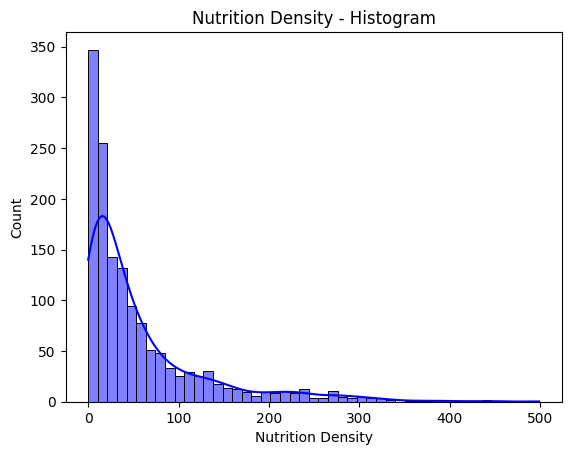

In [138]:
# visualize distribution of the target variable using barplot
sns.histplot(data['Nutrition Density'], kde = True, color = 'blue')
plt.title('Nutrition Density - Histogram')
plt.show()

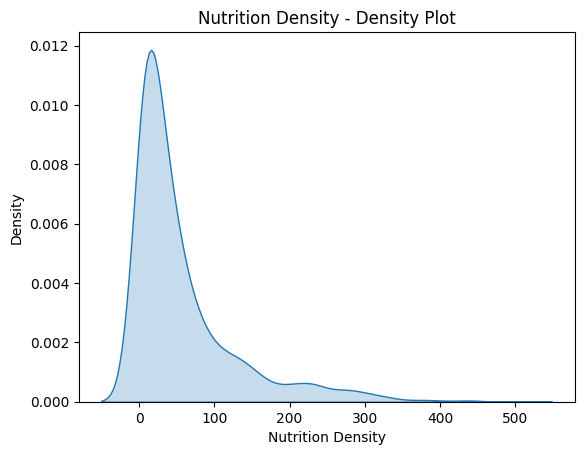

In [139]:
# visualize the distribution of the target variable using density plot
sns.kdeplot(data['Nutrition Density'], fill = True)
plt.title('Nutrition Density - Density Plot')
plt.show()

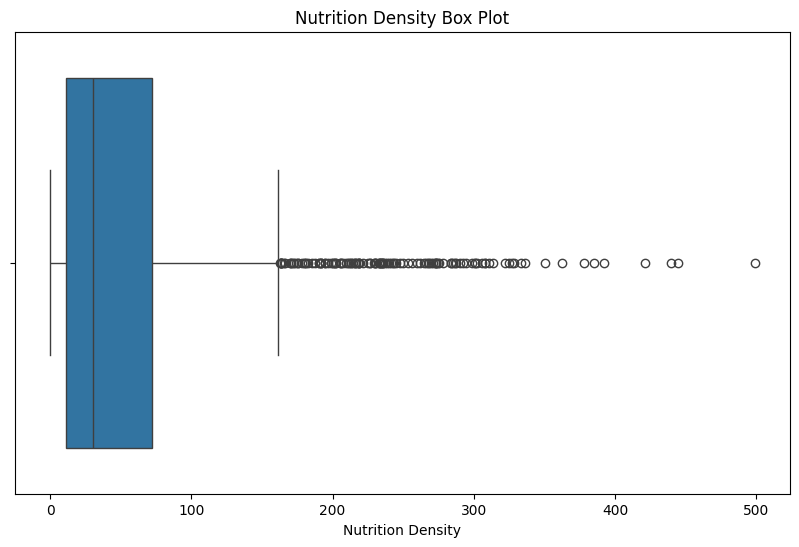

In [140]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data, x='Nutrition Density')

# Add title and labels
plt.title('Nutrition Density Box Plot')
plt.xlabel('Nutrition Density')

# Show the plot
plt.show()

All three of these visualizations are suggesting a right skewed distribution for our target variable. As expected with food data there are a good amount of outliers to the right. This might suggest that before modeling we should use a transformation on our target variable to reduce the influence of these outliers and make the data more effective for linear regression models.

We will now look at the correlations between all features and our target variable using a correlation heatmap.

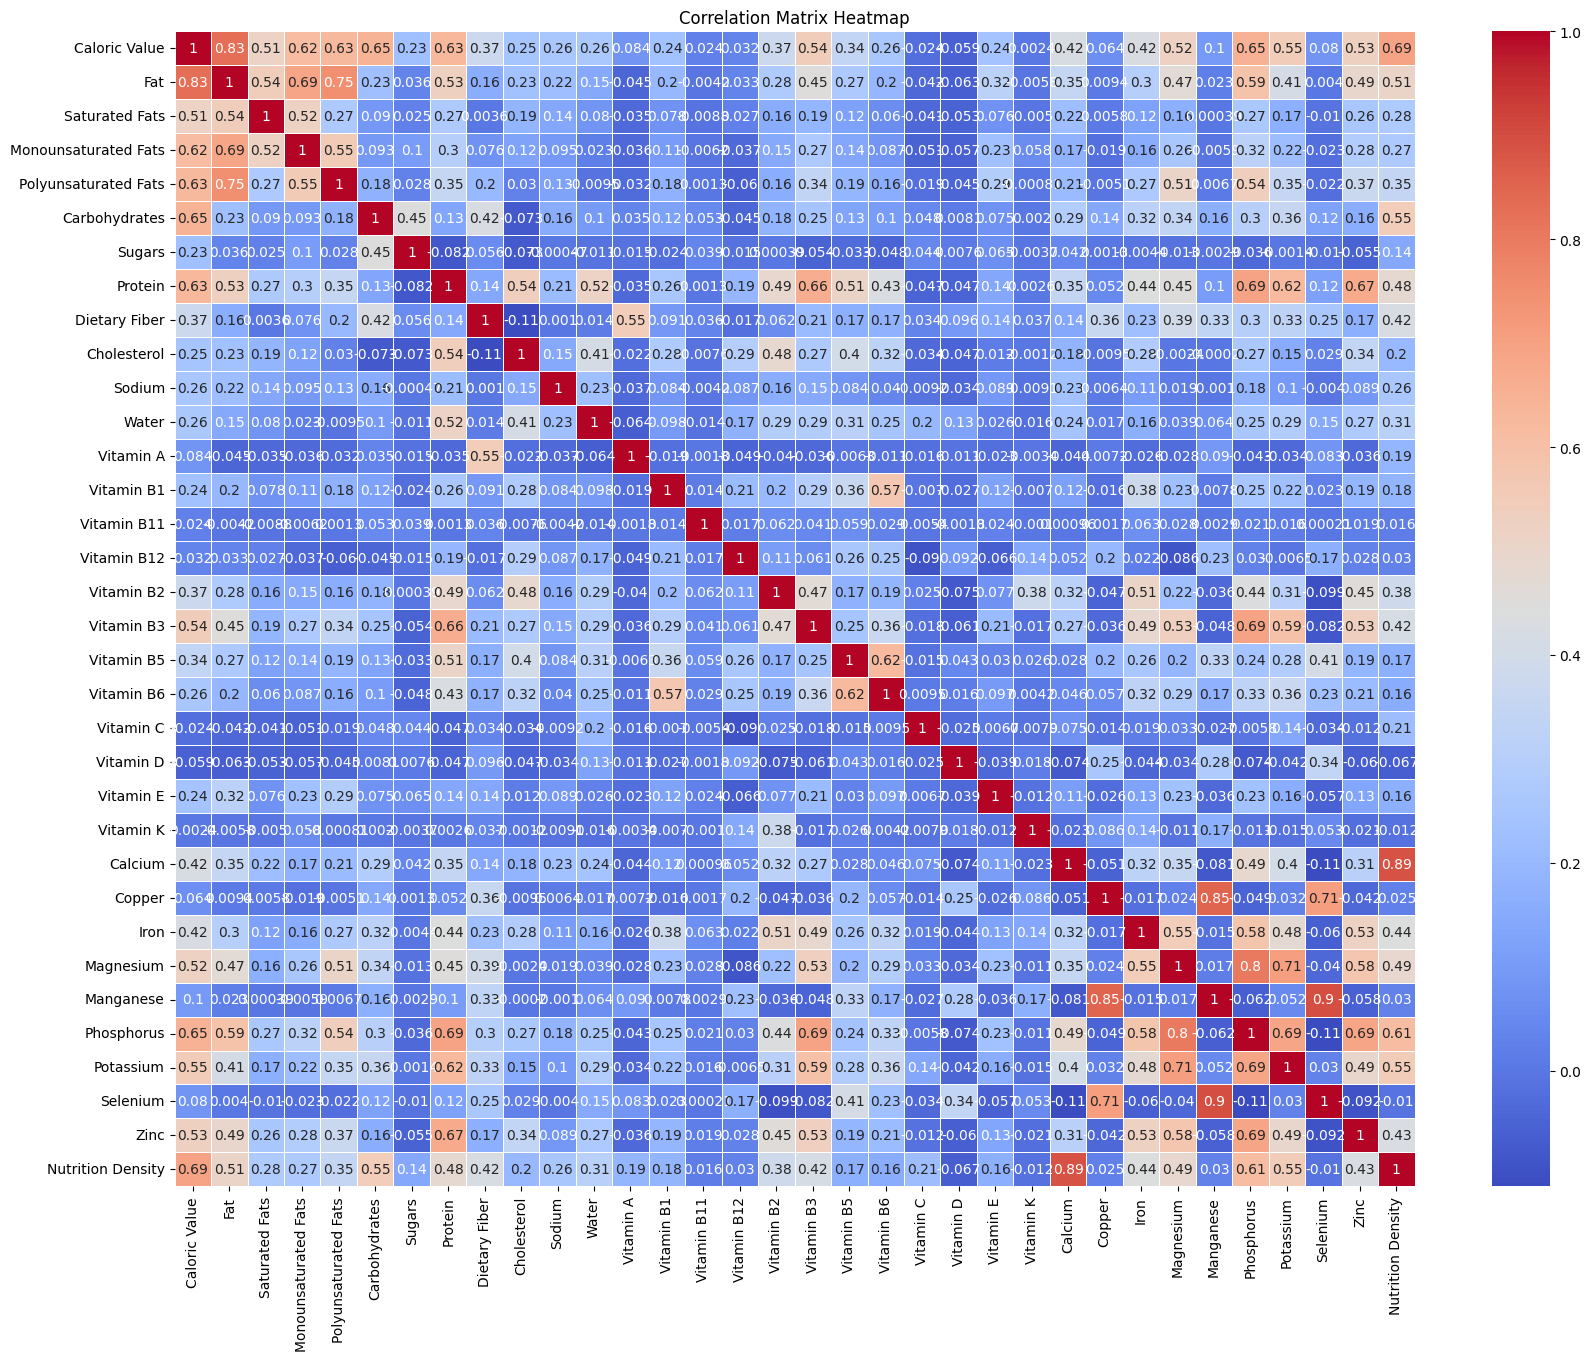

In [141]:
corr_matrix = data.iloc[:, 1:].corr() # create correlation matrix for all numeric variables

plt.figure(figsize = (20,15))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5) # plot correlation matrix using heatmap 
plt.title("Correlation Matrix Heatmap")


plt.show()

Upon inspection of this correlation matrix we can see that some micronutrients such as Calcium, Phosphorus and Potassium have a high correlation $(> 50)$ with our target variable. For the macronutrients, Fat and Carbohydrates also have a relatively high correlation with Nutrition Density.

We want to take a look at the individual scatterplots between the highest correlated features and the target variable, thus we will extract the top eight features with the highest correlation to the target variable and create a scatterplot along with a linear regression line.

In [142]:
sorted_corr_nd = corr_matrix['Nutrition Density'].sort_values(ascending = False) # sort the features by correlation score to target variable
top_corr_nd = sorted_corr_nd[1:9] # extract the top eight features with the highest correlation scores
top_corr_nd = top_corr_nd.index.tolist()

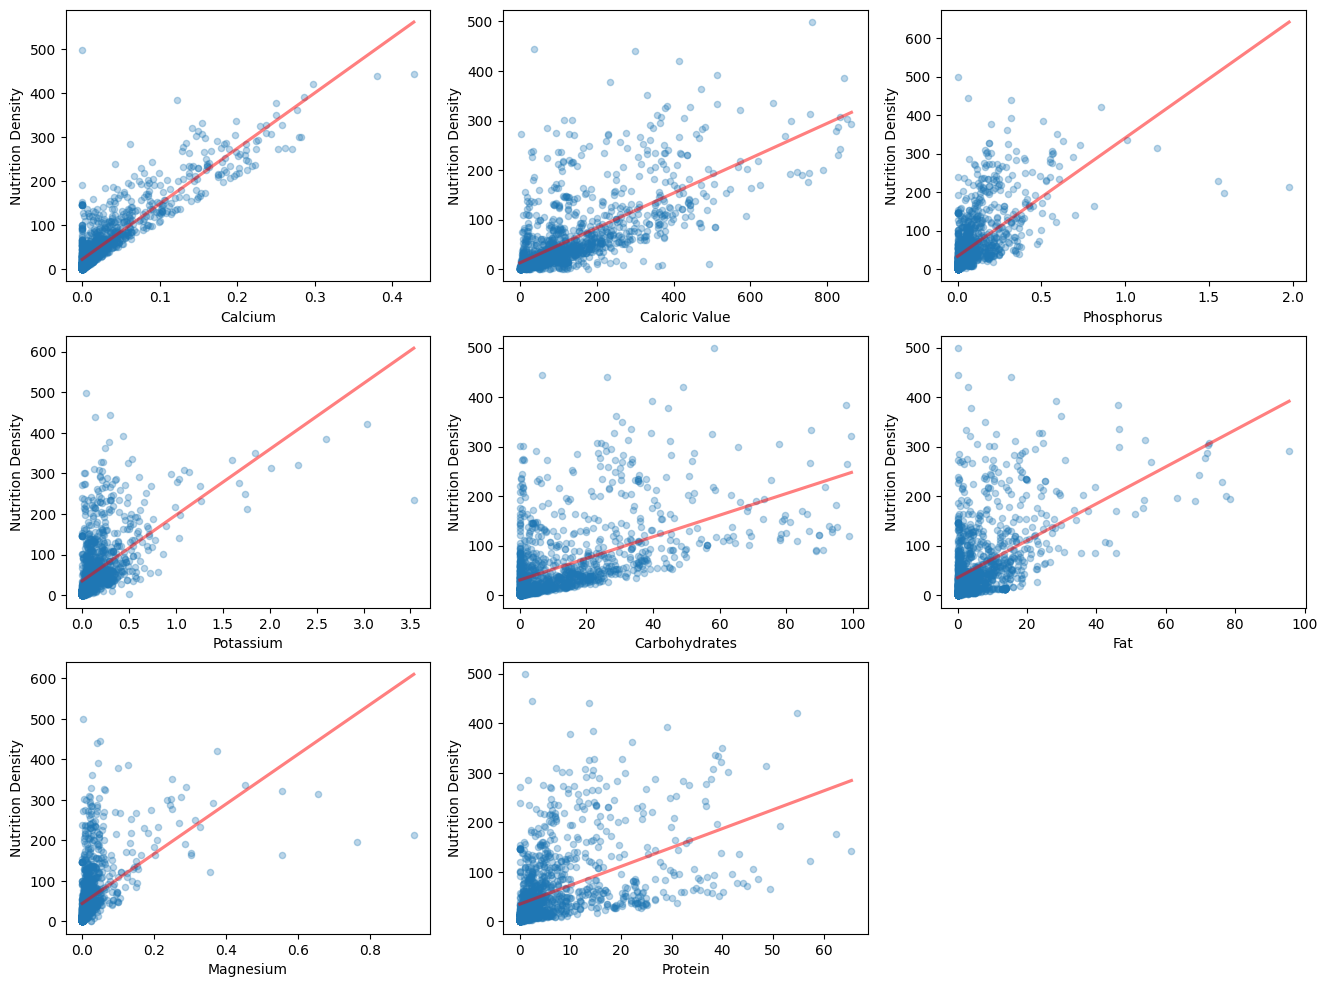

In [143]:
plt.figure(figsize=(16,12))
for i, nutrient in enumerate(top_corr_nd): # create scatter plots for features highly correlated with target variable
    plt.subplot(3,3,i+1)
    sns.regplot(data = data, x = nutrient, y ='Nutrition Density',
                ci = None, scatter_kws = {"s" : 20, "alpha" : 0.3}, 
                line_kws = {"color" : "red", "alpha" : 0.5})
plt.show()

These scatterplots confirm what the correlation matrix was portraying, with Calcium having a noticeably more linear relationship with Nutrition Density as compared to any other feature. With that being said the most of the other features in these plots have a loose linear relationship with the target variable so they may be useful in fitting linear regression based models.

### Macronutrient Analysis

Macronutrients are the most discussed aspect of food nutrition. Let us take a look and see how these features are shaped and if they are worth talking about as much as they are when it comes to a food being healthy.

In [144]:
macro_cols = ['Caloric Value', 'Fat', 'Protein', 'Carbohydrates'] # subset the dataframe with only the macronutrient features
macro_data = data.loc[:, macro_cols]

We will create boxplots for each of the macronutrients to see how their distribution compares to the target variable and eachother.

In [145]:
def box_plot_macros(macro): 
    """
    Create a boxplot of each macronutrient using Seaborn.
    
    Parameters
    ----------
    macro: the column to be used in subsetting the original data matrix

    Returns
    -------
    Seaborn box plot of the specified macro feature 
    """
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot
    sns.boxplot(data=data, x=macro)
    
    # Add title and labels
    plt.title(f'{macro} Box Plot')
    plt.xlabel(macro)
    
    # Show the plot
    plt.show()

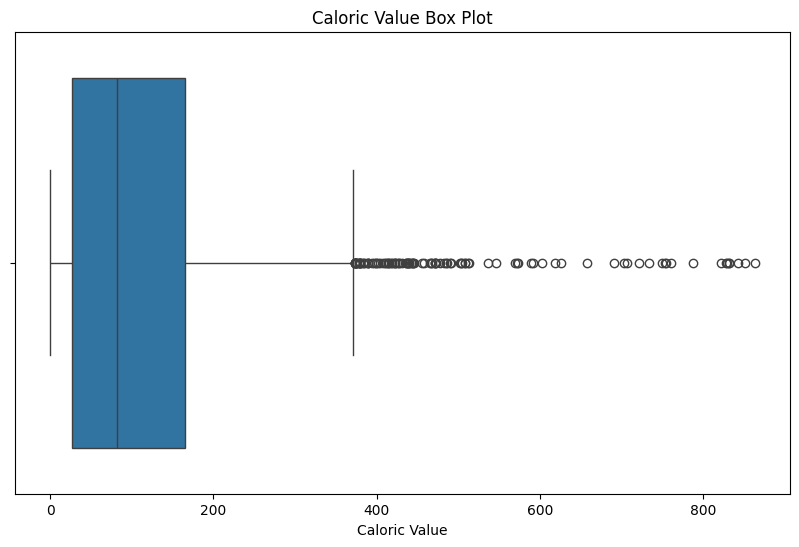

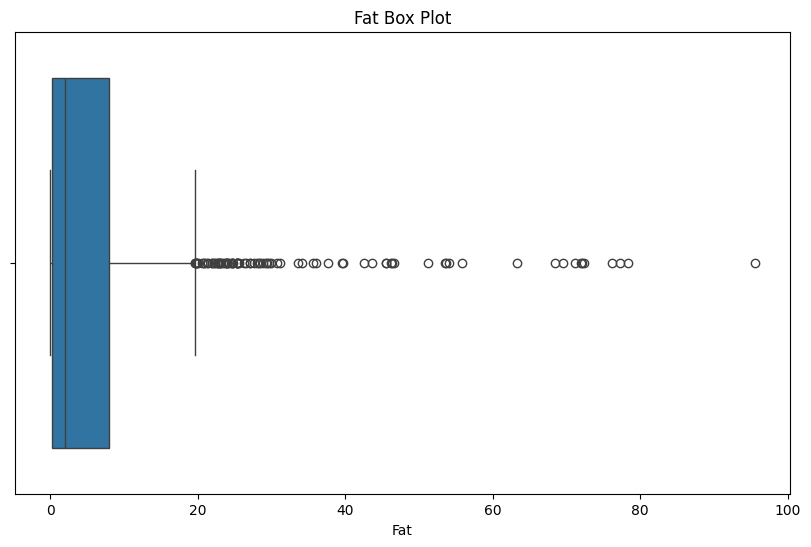

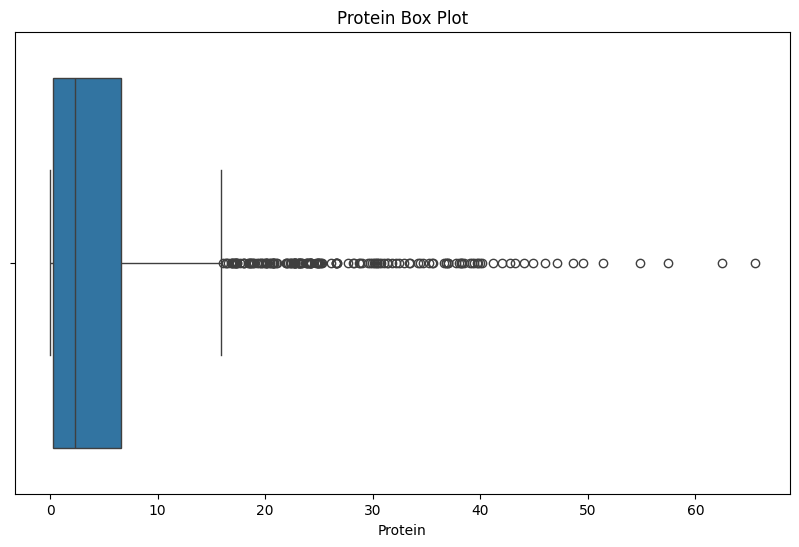

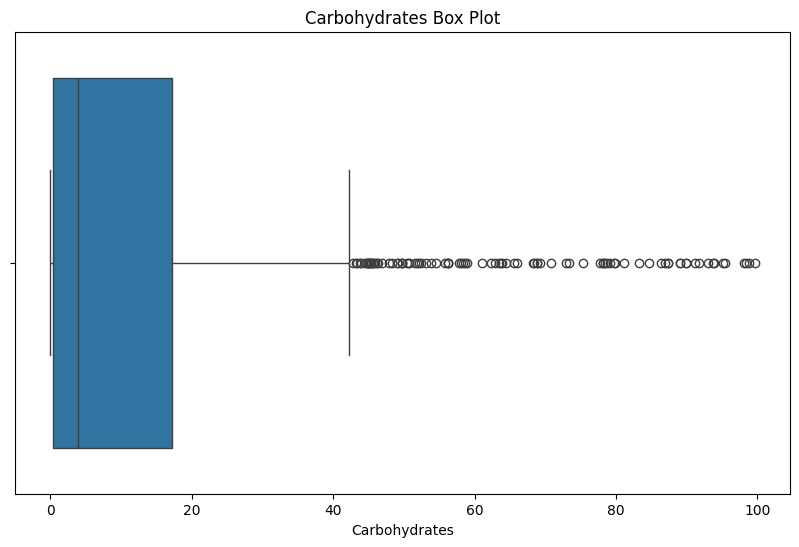

In [146]:
for macro in macro_cols: # run the box_plot_macros function for each macronutrient 
    box_plot_macros(macro)

Just as was the case with Nutrition Density, all of the macronutrients are right skewed, with Fat being the most right skewed and Caloric Value being the least. This is useful information to gather for modeling as again, there may be transformations to this data in order to make it more effective in our machine learning methods. 

We will now look at the correlation between all macronutrients and Nutrient Density to see any apparent patterns.

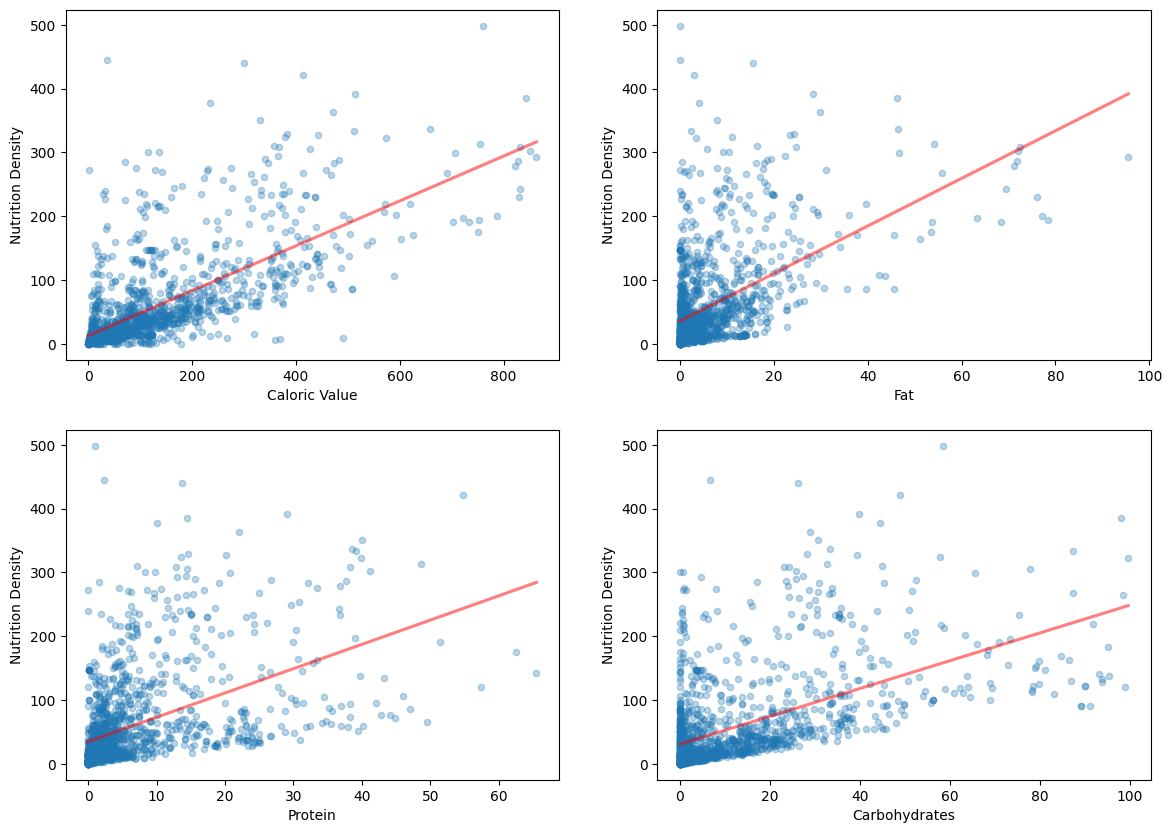

In [147]:
plt.figure(figsize=(14,10))
for i, macro in enumerate(macro_cols): # create scatterplots for the target variable and each macro nutrient
    plt.subplot(2,2,i+1)
    sns.regplot(data = data, x = macro, y ='Nutrition Density',
                ci = None, scatter_kws = {"s" : 20, "alpha" : 0.3}, 
                line_kws = {"color" : "red", "alpha" : 0.5})
plt.show()

All macronutrients have at least a slight linear relationship with the target variable, with Caloric Value having the strongest linear relationship while fat,protein, and carbohydrates have similar correlations.

If many of the macronutrients have similar correlations with the target variable, it would interesting to see how they correlate with one another. Thus we will look at a pairplot between these four features.

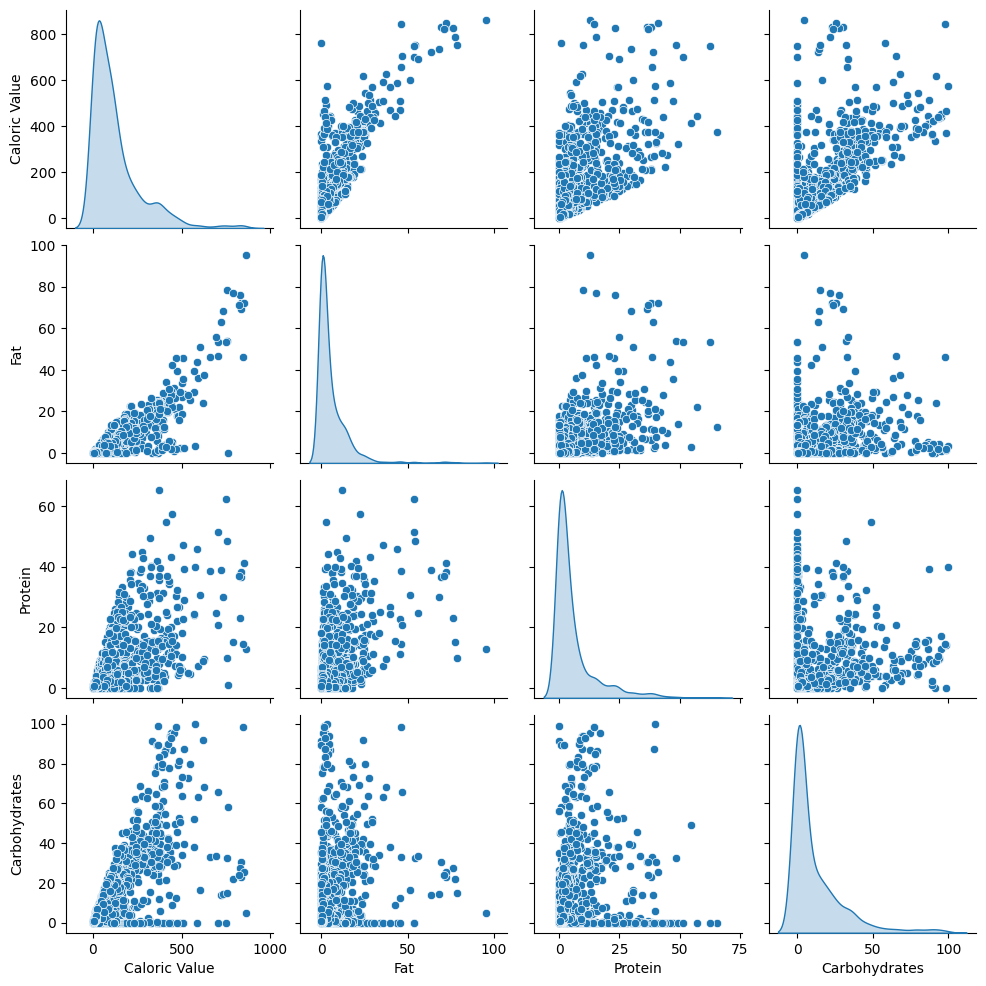

In [148]:
sns.pairplot(macro_data, diag_kind = 'kde') #create a pairplot to analyze correlation between different macronutrients 
plt.show()

The only feature that had an apparent linear correlation with any of the macronutrients here is Caloric Value which makes logical sense. If there are more fats, proteins or carbohydrates in a food it will be more calorically dense. However, These macro nutrients do not appear to have a strong relation with eachother which is an interesting observation.

Section 1 ~ Conclusion:

With all of our data cleaned and explored we have concluded that most of our data is right skewed. This makes sense as it is more likely for a food to have none of a nutrient as opposed to have an abundance of it. This observation allows us to perform the necessary transformations to our data when trying to build regression and classification models. 

We have also observed the correlation between our target variable, Nutrition Density, and the other features of the dataset. There are some significant linear correlations present. For example, Calcium, Potassium ,Phosphorus and Caloric Value all had relatively high correlations to this variable. This information is good to know when creating models as it allows us to if not try and prioritize these features, have insight on where the model parameters are most likely being drawn from.

## Section 2) Supervised Learning ~ Regression

Our first machine learning task will be trying to predict Nutrition Density using regression models, these will range from Simple Linear regressions all the way to a Neural Network.

In [149]:
# import necessary libraries for machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import svm

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

from xgboost import XGBRegressor

As is typical in machine learning we will first isolate our target variable and our predicting features and split both the target variable and data into training and testing sets. This allows us to test our models on data that has not been seen yet.

We will also scale our data in order to make sure that the outliers that were noticed before have less of an impact on our models.

In [150]:
X = data.iloc[:,1:34] # features
y = data['Nutrition Density'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42) # split the data into training and testing

In [151]:
scaler = StandardScaler() # instantiate scaler

X_train = scaler.fit_transform(X_train) # scale both testing and training data for machine learning 
X_test = scaler.transform(X_test)

In order to standardize our testing process, for all regression models that require hyper paratmeter tuning we will create a function that performs Grid Search Cross Validation, prediction and loss calculation all in one.

In [152]:
def perform_grid_search_and_evaluate(model ,param_grid, X_train, y_train, X_test, y_test, randomized = False):
    """
    Perofrm grid search (either full or randomized) on model and return the best estimator and testing metrics
    
    Parameters
    ----------
    model: model for hyperparameter tuning
    param_grid : parameter grid used for Grid Search
    X_train : training data
    y_train: training outputs

    X_test: testing data
    y_test: testing outputs

    randomized: boolean value specifying random grid search (better for computational efficiency) or full grid search

    Returns
    -------
    dictionary of the best hyper parameters along with the Mean Sqaured Error Metric
    """

    if randomized == True: # perform randomized grid search
            grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, verbose = 1, n_jobs = -1)

    else: # perform full grid search
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1, error_score = 'raise')
    
    grid_search.fit(X_train, y_train) # fit the grid search to the training data

    best_estimator = grid_search.best_estimator_ # extract the best estimator from the grid search object
    
    y_pred = best_estimator.predict(X_test) # use this best estimator to make predictions on the test set

    MSE = mean_squared_error(y_test, y_pred) # compute Mean Squared Error on testing data

    results = {
        'best_params' : grid_search.best_params_,
        'mean_square_error' : MSE,
    }

    return best_estimator, results # return dictionary of best parameters and the mean squared error

### Simple Linear Regression

In [153]:
linreg_model = LinearRegression() # instantiate linear regression model
linreg_model.fit(X_train, y_train) # fit linear regression model

y_pred = linreg_model.predict(X_test) # make predictions on testing data
MSE = mean_squared_error(y_test, y_pred) # calculate mean squared error
print(f'Mean Squared Error: {MSE}') # print mean squared error

Mean Squared Error: 0.002265219070583462


This is a very good mean squared error score suggesting that the linear correlations that were observed previously were very good predictors for nutrition density.

This also gives us insight into the underly pattern of the data suggesting a simpler linear pattern which can give us good insight into our proceeding models.

### Ridge Regression Model

In [154]:
param_grid_ridge = { # initialize the parameter grid for ridge regression
    'alpha' : [0.01, 0.1, 1, 10, 100]
}
# perform grid search and evaluation on ridge regression model
ridge_model, ridge_results = perform_grid_search_and_evaluate(model = Ridge(), param_grid = param_grid_ridge,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test)
# print best hyperparameters and mean squared error
for key, value in ridge_results.items():
    print(f'{key} : {value}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_params : {'alpha': 0.01}
mean_square_error : 0.0022419818879429484


Our Ridge Regression model performes slightly better than standard Ordinary Least Squares regression, this is most likely due to the fact that there is some multicollinearity in our data, meaning that some features are explaining the same underlying pattern.

### Lasso Regression Model

In [155]:
param_grid_lasso = { # initialize the parameter grid for lasso regression
    'alpha' : [0.01, 0.1, 1, 10, 100]
}
# perform grid search and evaluation on lasso regression model
lasso_model, lasso_results = perform_grid_search_and_evaluate(model = Lasso(), param_grid = param_grid_lasso,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test)
# print best hyperparameters and mean squared error 
for key, value in lasso_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_params : {'alpha': 0.01}
mean_square_error : 0.0041032982652989426


Our Lasso Regression models performs worse than our standard Ordinary Least Squares linear regression, implying that our data does not benefit from sparcity, or some of the coefficients of linear regression beign 0.

## Tree Based Model

We will now look at tree based models to see if they perform nearly as well as models with linear assumptions.

### Decision Tree Regressor

In [156]:
param_grid_dtr = { # initialize the parameter grid for decision tree regression
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None,'sqrt', 'log2']
}
# perform grid search and evaluation on decision tree regressor model
dtr_model, dtr_results = perform_grid_search_and_evaluate(model = DecisionTreeRegressor(), param_grid = param_grid_dtr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test, randomized = False)
# print best hyperparameters and mean squared error 
for key, value in dtr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


best_params : {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
mean_square_error : 162.3819876100171


Even with hyperparameter tuning it is apparent that tree based models will not be as effective as linear models. The mean squared error of a simple linear regression model was significantly less than 1 and that of a decision tree regressor is significantly over 100.

### Random Forest Regressor

In [157]:
param_grid_rfr = { # initialize the parameter grid for random forest regression
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
# perform random grid search and evaluation on random forest regressor model
rfr_model, rfr_results = perform_grid_search_and_evaluate(model = RandomForestRegressor(), param_grid = param_grid_rfr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)
# print best hyperparameters and mean squared error 
for key, value in rfr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best_params : {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'squared_error', 'bootstrap': False}
mean_square_error : 198.56174745457298


Due to the computational cost of grid search, for the following non deep regression models we will be using randomized grid search. Here we can see a constant theme developing with the tree based models, that being higher mean squared error than can be slightly minimized by hyper parameter tuning.

### AdaBoost Regressor

In [158]:
param_grid_abr = { # initialize the parameter grid for AdaBoost regression
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1, 10],
    'loss': ['linear', 'square', 'exponential']
}
# perform random grid search and evaluation on AdaBoost Regressor Model
abr_model, abr_results = perform_grid_search_and_evaluate(model = AdaBoostRegressor(), param_grid = param_grid_abr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)
# print best hyperparameters and mean squared error 
for key, value in abr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best_params : {'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.1}
mean_square_error : 463.0675841537445


With the mean squared error even higher for this model. There is some evidence that bagging may be more effective than boosting for this dataset.

### XGBoost Regressor

In [159]:
param_grid_xgbreg = { # initialize the parameter grid for XGBoost regression
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 0.1, 0.01]
}
# perform random grid search and evaluation on XGBoost Regressor Model
xgbrerg_model, xgbreg_results = perform_grid_search_and_evaluate(model = XGBRegressor(), param_grid = param_grid_xgbreg,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)

# print best hyperparameters and mean squared error 
for key, value in xgbreg_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
mean_square_error : 35.08710609245995


This contradicts the statement that bagging would be better than boosting in this case. It also confirms the notion that XGBoost is one of the most powerful non deep model for both regression and classification.

### Support Vector Machine ~ Regression

In [160]:
param_grid_svr = {
    'kernel' : ['linear'], # initialize the parameter grid for SVM regression
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
# perform grid search and evaluation SVM Regressor Model
svr_model, svr_results = perform_grid_search_and_evaluate(model = svm.SVR(), param_grid = param_grid_svr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)

# print best hyperparameters and mean squared error 
for key, value in svr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params : {'kernel': 'linear', 'gamma': 1, 'epsilon': 0.01, 'C': 10}
mean_square_error : 0.0024333549237461607


The Support Vector Regressor is also very effective, which again makes sense because we are using a linear kernel. We have already shown that using linear assumptions is best for this prediction on this data.

Conclusion:
It is clear that models that have a linear assumption perform the best on this dataset. This suggests that the linear relationship noticed in the previous section is very strong and can act as a good predictor for nutrition density. 

With that being said, XGBoost had decent mean squared error while Support Vector Machine had the best mean squared error. This make intuitive sense as XGBoost is one of the most powerful boosting regressor, and Support Vector Regerssion is using a linear assumption.

## Neural Network ~ Regression

We will now construct a fully connected Neural Network and see how it performs as compared to our previous machine learning models.

In [161]:
# import necessary libraries for building a Neural Network
import torch
import torch.nn as nn 
import torch.optim as optim

from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

import time

In [162]:
if torch.backends.mps.is_available(): # my current system is Mac Silicon so I will be using the GPU associated with that
    device = torch.device("mps")
    print("Using MPS device")
else:
    device = torch.device("cpu") # revert the device back to the cpu if mps is not avilable
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")
    print("Falling back to CPU device")

Using MPS device


Because I am running this code on a Mac with an M3 chip I will run this Neural Network on my GPU. I have added code to revert back to the CPU if this Mac chip is not accessible on a system

In [163]:
X_train = X_train.astype(np.float32) # make sure training features are floats and in numpy arrays
X_test = X_test.astype(np.float32) # make sure testing features are floats and in numpy arrays

y_train = np.array(y_train, dtype = np.float32) # make sure training labels are floats and in numpy arrays
y_test = np.array(y_test, dtype = np.float32) # make sure testing labels are floats and in numpy arrays


We first transform our training and testing data into numpy arrays so that we can transform them into tensors below.

In [164]:
X_train_tensor = torch.from_numpy(X_train).squeeze() #create tensor for training features and remove extraneous dimensions
y_train_tensor = torch.from_numpy(y_train).squeeze() #create tensor for training labels and remove extraneous dimensions
X_test_tensor = torch.from_numpy(X_test).squeeze() #create tensor for testing features and remove extraneous dimensions
y_test_tensor = torch.from_numpy(y_test).squeeze() #create tensor for testing labels and remove extraneous dimensions


In [165]:
class CustomDataset(Dataset):
    """
    Class used to format data into Dataset that is compatible with data loader

    Attributes
    ----------
    Dataset: abstract class that provides structure for PyTorch Dataset
    """

    def __init__(self, X, y):
        """
        Initializes the CustomDataset with X data and y data

        Parameters
        ----------
        X: torch tensor
            Feature Data
        y : torch tensor
            Target Variable
        """
        self.X  = X
        self.y = y

    def __len__(self):
        """
        Obtains the length of the CustomDataset
        """
        return len(self.X)
    
    def __getitem__(self, idx):
        """
        Allows  the CustomDataset to be indexed
        """
        return self.X[idx], self.y[idx]

Constructing this CustomDataset class allows us to pass the training and testing data to DataLoader objects, allowing for either batching and shuffling of our data.

In [166]:
train_data = CustomDataset(X_train_tensor, y_train_tensor) # transform the training data into an CustomDataset() object
test_data = CustomDataset(X_test_tensor, y_test_tensor) # transform the testing data into a CustomDataset() object

In [167]:
train_loader = DataLoader(dataset = train_data,
                           batch_size = 50, shuffle = True, num_workers = 0) # instantiate a dataloader object for the training data
test_loader = DataLoader(dataset = test_data, batch_size = 50) # instantiate a dataloader object for the testing data

In [168]:
class fully_connected_nn(nn.Module):
    """
    Class to define our fully connected Neural Network

    Attributes
    ----------
    nn.Module: parent class that contains methods for creating neural network
    """
    def __init__(self):
        """
        Initializes the neural network with all necessary layers
        """
        super().__init__()

        self.layer1 = nn.Linear(33, 64) # inputs the 33 features and feeds it through a layer with width = 64
        self.layer2 = nn.Linear(64,64) # layer with width 66
        self.layer3 = nn.Linear(64, 1) # output a single value for prediction

      

    def forward(self, x):
        """
        defines the process when data is passed through the neural network

        Parameters
        ----------
        x: torch tensor
            Defines the data to pass through the tensor
        """

        x = x.view(-1, 33) # make sure the data is correctly formatted, 33 features

        out = self.layer1(x) # first layer 
        out = torch.relu(out) # ReLU function for non linearity

        out = self.layer2(out) # second layer
        out = torch.relu(out) # ReLU function for non linearity

        out = self.layer3(out) # third layer
           

        return out # return prediction

We now construct our model, defining all of the layers aswell as the path our data will take when it is passed through the model.

The amount of neurons in each layer is relatively low as from our previous modeling we can see that there is a strong linear relationship between the data and the outputs. This is not a very complicated realtionship so we should not need a very complex network in order to learn this pattern.

In [169]:
model_nn = fully_connected_nn() # instantiate model
model_nn = model_nn.to(device) # confirm model is being ran on gpu

In [170]:
optimizer = optim.Adam(model_nn.parameters(), lr = 0.1) # instantiate Adam optimizer
criterion = nn.MSELoss() # instantiate Mean Squared Error as loss function

We pick the ADAM optimizer as it is the most used in practice and will reduce the computational efficiency during the training process.

We also pick Mean Squared Error as our loss criteria as again, it is the most used in practice.

In [172]:
start = time.time() # start timer

num_epochs = 101 # intialize the number of epochs

for epoch in range(num_epochs): # iterate through epochs
    running_loss = 0 # initialize training loss
    running_loss_test = 0  # initialize testing loss
    model_nn.train() # put model into training mode

    for batch_data, batch_labels in train_loader: # obtain data batches and label batches from the DataLoader object
        optimizer.zero_grad() # clear gradients

        batch_data = batch_data.to(device) # confirm training data is on gpu
        batch_labels = batch_labels.to(device) # confirm training labels are on gpu 
        
        outputs = model_nn(batch_data).squeeze() # run data through model, receive outputs, and remove any extraneous dimensions
        loss = criterion(outputs, batch_labels) # compute loss through Mean Squared Error

        loss.backward() # perform back propogation
        optimizer.step() # update weights

        running_loss += loss.item() # update running loss

    model_nn.eval() # put model into evaluation mode

    with torch.no_grad(): # make sure the gradient is not required
        for batch_data_test, batch_labels_test in test_loader: # obtain testing data and testing labels from DataLoader object
            batch_data_test = batch_data_test.to(device) # confirm testing data is on gpu
            batch_labels_test = batch_labels_test.to(device) # confirm training data is on gpu

            test_outputs = model_nn(batch_data_test).squeeze() # obtain outputs for testing data, remove extraneous dimension
            test_loss = criterion(test_outputs, batch_labels_test.float().squeeze()) # calculate test loss
            running_loss_test += test_loss.item() # update test loss
                        
    if (epoch) % 10 == 0: # print the  number of epochs, training loss and testing loss every 10 epochs
        print(f"Epoch [{epoch}/{num_epochs-1}], Time: {round(time.time() - start, 2)} seconds")
        print(f"Loss: {running_loss/len(train_loader):.2f}, Test Loss = {running_loss_test/len(test_loader):.2f}")

print("Training complete.") # confirm training is complete


Epoch [0/100], Time: 0.84 seconds
Loss: 3076.80, Test Loss = 4939.02
Epoch [10/100], Time: 3.4 seconds
Loss: 20.36, Test Loss = 1000.45
Epoch [20/100], Time: 6.06 seconds
Loss: 18.01, Test Loss = 343.00
Epoch [30/100], Time: 8.47 seconds
Loss: 8.66, Test Loss = 114.72
Epoch [40/100], Time: 10.99 seconds
Loss: 246.61, Test Loss = 61.82
Epoch [50/100], Time: 13.59 seconds
Loss: 53.01, Test Loss = 13.88
Epoch [60/100], Time: 15.98 seconds
Loss: 17.51, Test Loss = 15.29
Epoch [70/100], Time: 18.3 seconds
Loss: 10.24, Test Loss = 6.07
Epoch [80/100], Time: 20.6 seconds
Loss: 11.85, Test Loss = 29.02
Epoch [90/100], Time: 22.95 seconds
Loss: 8.09, Test Loss = 18.12
Epoch [100/100], Time: 25.37 seconds
Loss: 34.12, Test Loss = 26.64
Training complete.


Conclusion:
We can see that this Neural Network effectively learns the pattern of this data with the test error continually going down throughout each epoch.

Although the mean squared error for the testing data is not quite as low as that for the linear regression model, this network does a fine job at prediction, especially with all of the variability in the data.

## Section 3) Unsupervised Learning ~ Clustering/PCA

In this section we will try to attempt to cluster these food groups using K-Means clustering and hierarchical clustering.

In [173]:
# import libraries necessary for Clustering 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

from collections import Counter
import re
from wordcloud import WordCloud

In [174]:
scaler = StandardScaler() # instantiate scaler
data_scaled = data.iloc[:,1:] # obtain all numeric features

data_scaled = np.log1p(data_scaled) # log transform all features to normalize
data_scaled = scaler.fit_transform(data_scaled) # normalize all features

Here we log transfrom our data to try and extract more clear clusters from the data

Without the log transformation much of the data is clustered linearly which is not the goal.

In [175]:
pca = PCA(n_components = 2) # perform PCA for visulization after clustering
data_pca = pca.fit_transform(data_scaled)

We will also be utilizing PCA in order to visualize our data in two dimensions.

### K-Means Clustering

In [176]:
wcss = [] # initialize within cluster sum of squares
K = range(1,11) # number of clusters to text

for k in K: # test kmeans model on different number of clusters
        kmeans = KMeans(n_clusters= k, random_state = 42)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_) # append inertia to within cluster sum of squares

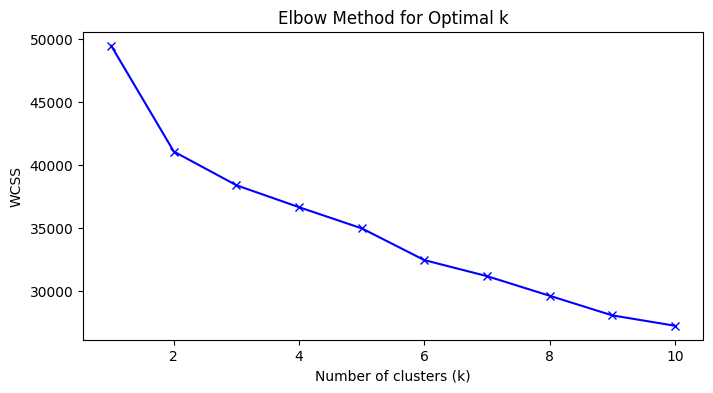

In [177]:
plt.figure(figsize=(8, 4)) # create elbow plot to find optimal number of clusters
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

Utilizing the elbow method, we can see that the optimal number of clusters is either 5 or 6 as this is where the within cluster sum of squares does not decrease enough to make another cluster worth it.

In [178]:
optimal_k = 5
kmeans = KMeans(n_clusters = optimal_k, random_state = 42) # create kMeans model
kmeans.fit(data_scaled) # fit kMeans model

KMeans(n_clusters=5, random_state=42)

In [179]:
cluster_labels_kmeans = kmeans.predict(data_scaled) # predict the clusters on the data
data_clusters_kmeans = data.copy() 
data_clusters_kmeans['PCA1'] = data_pca[:,0]
data_clusters_kmeans['PCA2'] = data_pca[:,1]
data_clusters_kmeans['Cluster'] = cluster_labels_kmeans # create dataframe with cluster column

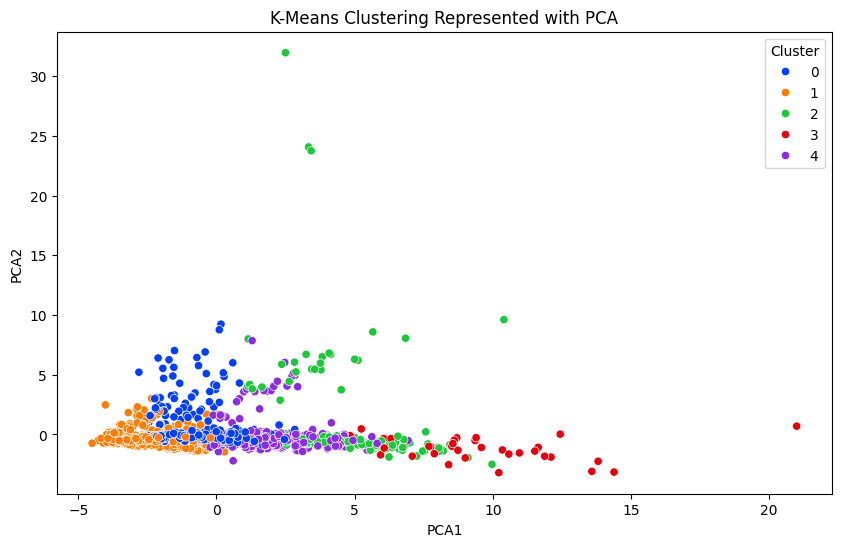

In [180]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter_plot = sns.scatterplot(data=data_clusters_kmeans, x='PCA1', y='PCA2', hue='Cluster', palette='bright')

# Add title and labels
scatter_plot.set_title('K-Means Clustering Represented with PCA')
scatter_plot.set_xlabel('PCA1')
scatter_plot.set_ylabel('PCA2')

plt.legend(title='Cluster')
plt.show()


Here we can see our clusters. However, there seems to be a decent amount of overlap between our clusters. Drawing lines based on food group may be difficult.

We will see how well the food groups are split by creating word clouds to see the frequency of words in each cluster.

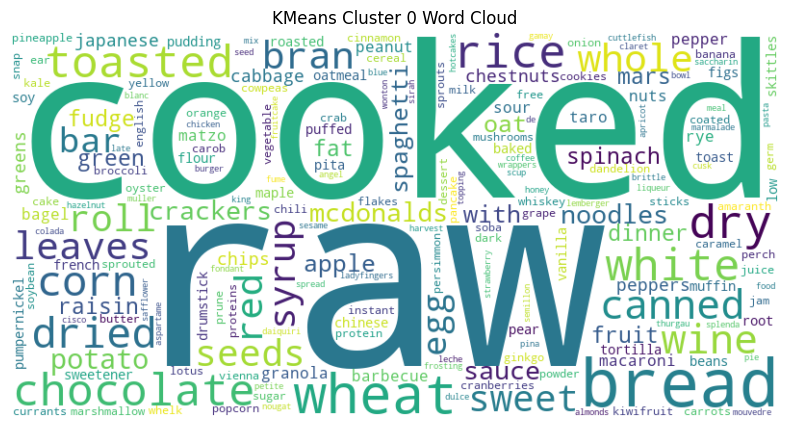

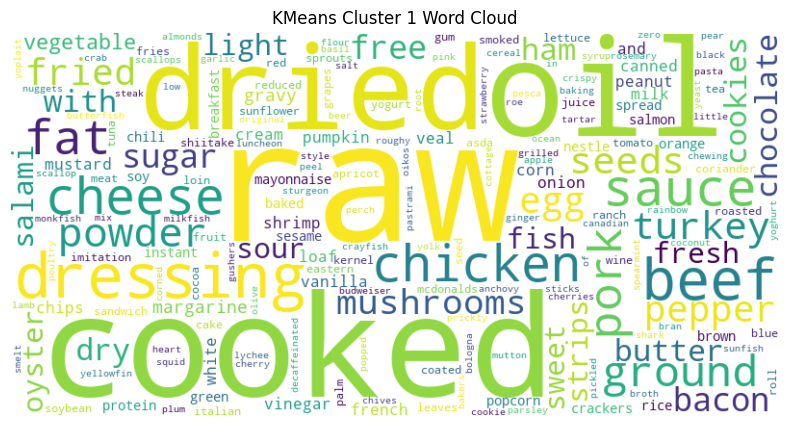

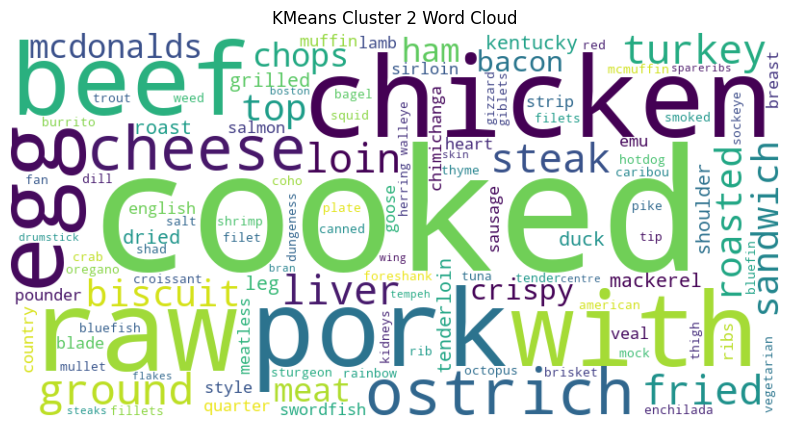

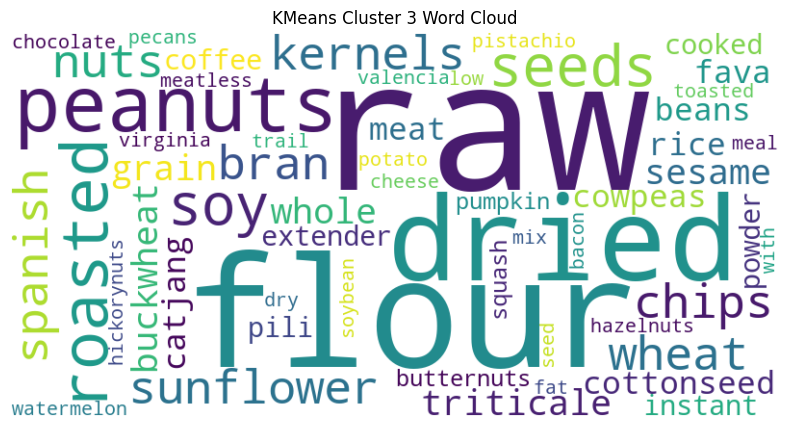

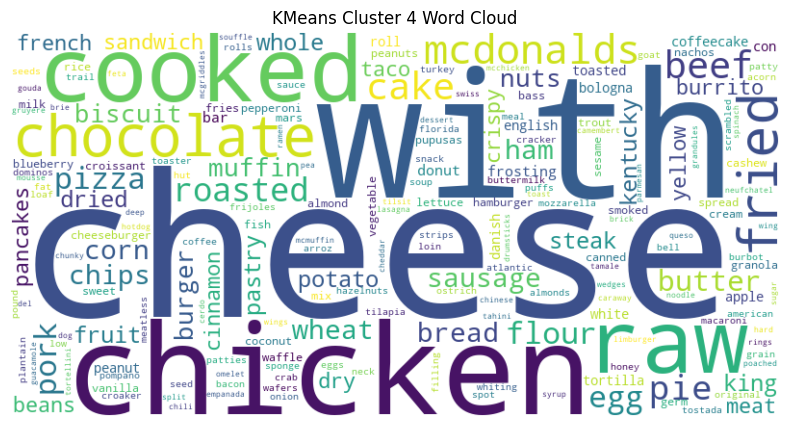

In [181]:
def extract_words(text):
    """
    Extracts words from a given text.

    This function converts the input text to lowercase and uses a regular 
    expression to find and return all words in the text. Words are defined 
    as sequences of alphanumeric characters.

    Parameters
    ----------
    text : str
        The input text from which to extract words.

    Returns
    -------
    list of str
        A list of words extracted from the input text.
    """
    return re.findall(r'\w+', text.lower())

word_freqs = {} #initialize word frequencies dictionary

for cluster, group in data_clusters_kmeans.groupby('Cluster'): # group the dataset by cluster
    words = group['food'].apply(extract_words).sum() #count the words in each cluster
    word_freqs[cluster] = Counter(words) # use Counter function to see which words appear most

for cluster, freqs in word_freqs.items(): # Create word cloud for each cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'KMeans Cluster {cluster} Word Cloud')
    plt.show() 

As assumed, there is no clear difference between the words in each cluster, suggesting that the data here is hard to separate into clear groups. Let's check if Hierarchical clustering performs any better.

### Hierarchical / Agglomerative Clustering

In [182]:
agglo = AgglomerativeClustering(n_clusters = 5) # instantiate hierachical modeling model
cluster_labels_agglo = agglo.fit_predict(data_scaled) # fit and predict using the model

data_clusters_agglo = data.copy() 
data_clusters_agglo['PCA1'] = data_pca[:,0]
data_clusters_agglo['PCA2'] = data_pca[:,1]
data_clusters_agglo['Cluster'] = cluster_labels_agglo # create dataframe with cluster column

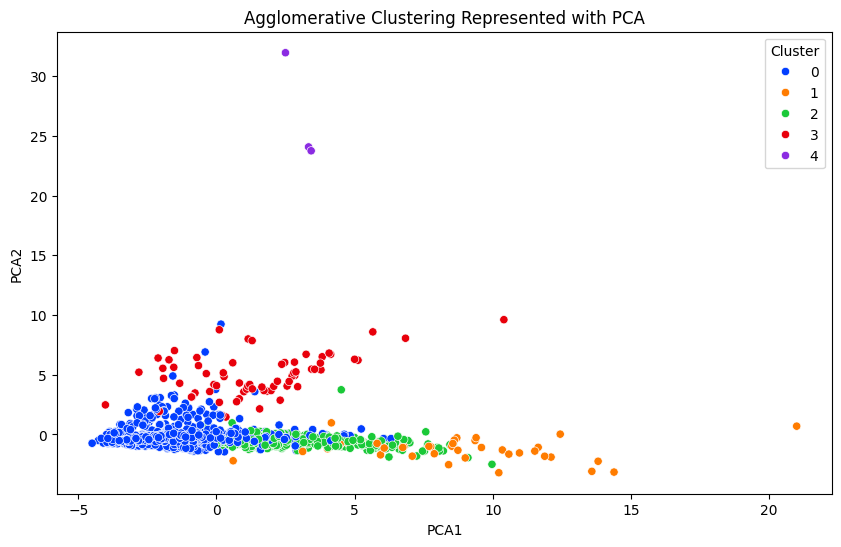

In [183]:
# Assuming data_clusters_agglo is your DataFrame
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter_plot = sns.scatterplot(data=data_clusters_agglo, x='PCA1', y='PCA2', hue='Cluster', palette='bright')

# Add title and labels
scatter_plot.set_title('Agglomerative Clustering Represented with PCA')
scatter_plot.set_xlabel('PCA1')
scatter_plot.set_ylabel('PCA2')

# Show the plot
plt.legend(title='Cluster')
plt.show()

Here there is obviously less overlap between our clusters, the outliers at the top of the graph are put into their own group and we can see more clear divisions between our clusters.

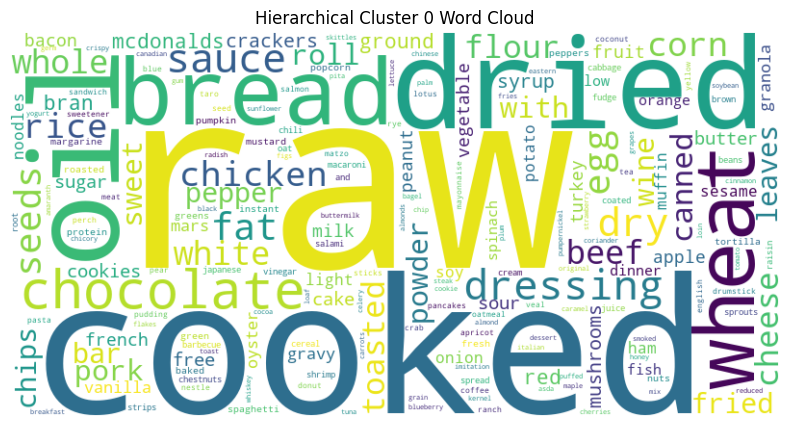

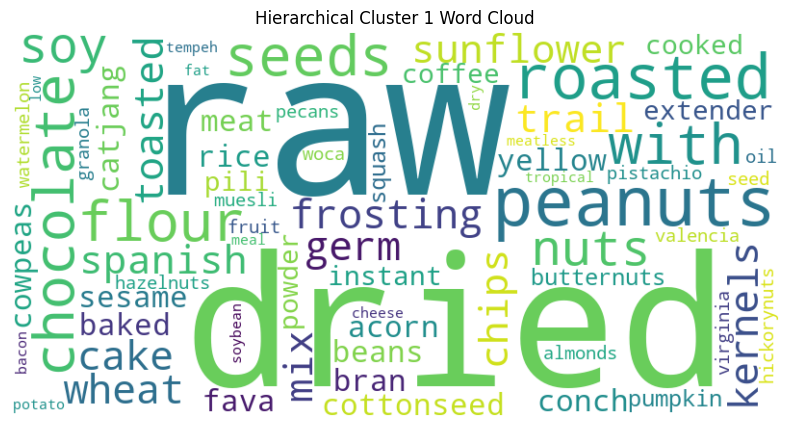

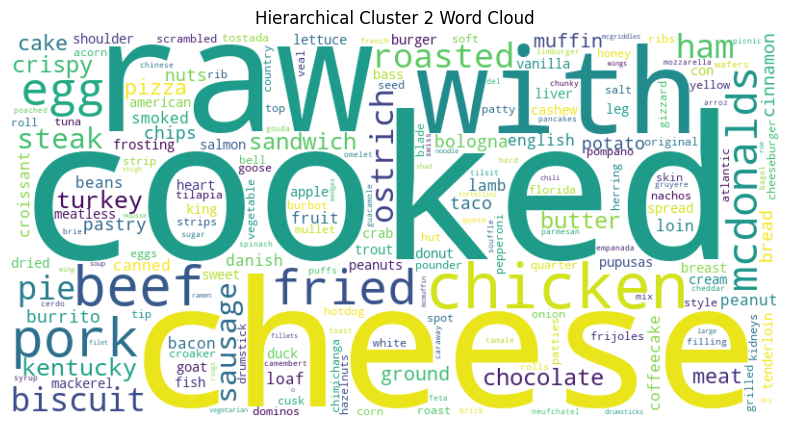

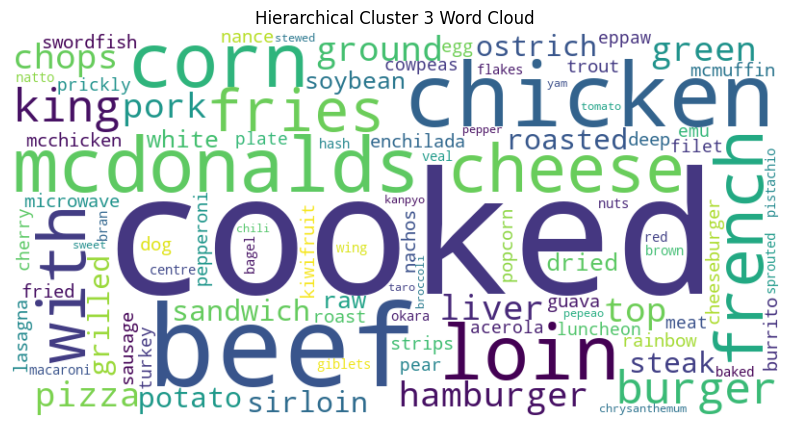

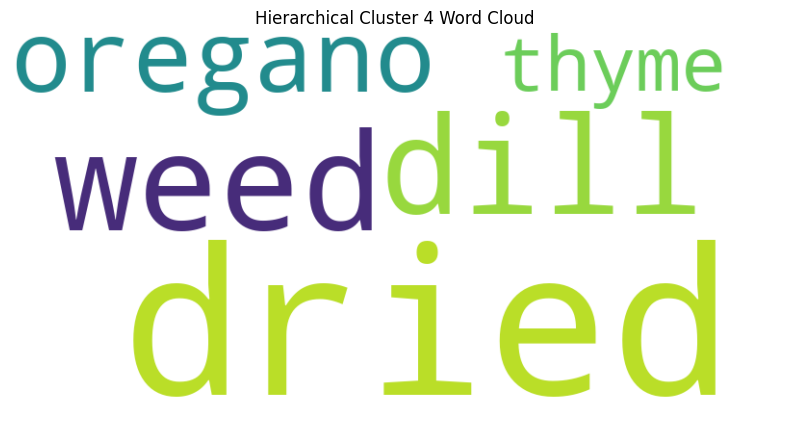

In [184]:
word_freqs = {} #initialize word frequencies dictionary

for cluster, group in data_clusters_agglo.groupby('Cluster'): # group the dataset by cluster
    words = group['food'].apply(extract_words).sum() #count the words in each cluster
    word_freqs[cluster] = Counter(words) # use Counter function to see which words appear most

for cluster, freqs in word_freqs.items(): # Create word cloud for each cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hierarchical Cluster {cluster} Word Cloud')
    plt.show() 

There is clearly better division between the food groups here when looking at the word clouds. The first cluster seems to be wheat based food, the second is seeds or nuts, the third is meat based, the fourth is fast food and the fifth is spices.

Conclusion:
This dataset is difficult to cluster as many different foods have similar nutrients. However, it appears that hierachical clustering is more effective than K-Means clustering as separates the foods into more discernable groups.

## Overall Conclusion:
The analysis and model-building process for the given dataset revealed several key insights and conclusions:

1.	Data Characteristics: The dataset predominantly exhibits right skewness. This characteristic is logical given the nature of the data, where it’s more common for food items to lack certain nutrients than to have them in abundance. Recognizing this skewness is crucial for appropriate data transformations when building regression and classification models.

2.	Correlation with Target Variable: Significant linear correlations were observed between the target variable, Nutrition Density, and other features like Calcium, Potassium, Phosphorus, and Caloric Value. This insight is valuable for model building as it highlights which features are most likely to influence the target variable.

3.	Model Performance:
-	Linear Models: Models assuming a linear relationship, such as linear regression, performed the best on this dataset. This suggests a strong linear relationship between the features and the target variable, making linear models effective predictors for nutrition density.
-	XGBoost and Support Vector Regressor: Both these models showed good performance in terms of mean squared error. XGBoost, being a powerful boosting regressor, and Support Vector Regression, which assumes a linear relationship, align well with the linear nature of the dataset. Support Vector Machine, was the most effective model.

4.	Neural Network Performance: While the neural network model effectively learned the data patterns, as indicated by the decreasing test error across epochs, its mean squared error for the testing data was not as low as that of the linear regression model. Despite this, the neural network performed reasonably well given the data’s variability.

5.	Clustering Challenges: The dataset posed challenges for clustering due to the similarity of nutrients across different foods. Hierarchical clustering was found to be more effective than K-Means clustering in distinguishing between different food groups.